In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import re
from collections import Counter


HEADERS = ["polarity", "id","date","query","user","content"]
TRAIN_FILE_LOC = "data/training.1600000.processed.noemoticon.csv"
TEST_FILE_LOC = "data/testdata.manual.2009.06.14.csv"

sns.set(color_codes=True)

In [3]:
training_data = pd.read_csv(TRAIN_FILE_LOC, header=None, encoding='latin-1',names=HEADERS)
test_data = pd.read_csv(TEST_FILE_LOC, header=None, encoding='latin-1',names=HEADERS)

In [32]:
def describe_data_set(data) :
    
    print("data head:")
    display(data.head())
    
    print("distribution of polarity:")
    fig = sns.distplot(data["polarity"], kde=False, rug=True)
    fig.xaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.show()
    
    word_vector = data["content"].apply(lambda x: re.sub("[^\w]", " ",  x).split())
    word_vector = [item for sublist in word_vector for item in sublist]

    word_counts = Counter(word_vector)
    df = pd.DataFrame.from_dict(word_counts, orient='index')
    df = df.sort_values(df.columns[0],ascending = False)
    a4_dims = (15, 12)

    top_50 = df.head(100)
    bottom_50 = df.tail(100)
    
    print("top words visualisation:")
    fig, ax = plt.subplots(figsize=a4_dims)
    
    fig = sns.barplot(x=top_50.index.values.tolist(),y=top_50.iloc[:, 0], ax=ax)
    fig.set_xticklabels(top_50.index.values.tolist(), rotation=90)
    
    plt.show()
    
    print("bottom words visualisation:")
    fig2, ax = plt.subplots(figsize=a4_dims)
    fig2 = sns.barplot(x=bottom_50.index.values.tolist(),y=bottom_50.iloc[:, 0], ax=ax)
    fig2.set_xticklabels(bottom_50.index.values.tolist(), rotation=90)
    
    plt.show()
    


data head:


,polarity,id,date,query,user,content
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


distribution of polarity:


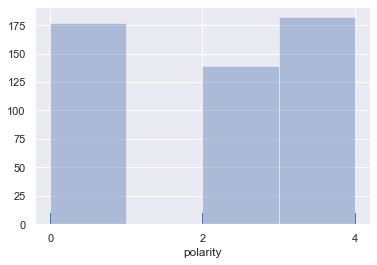

top words visualisation:


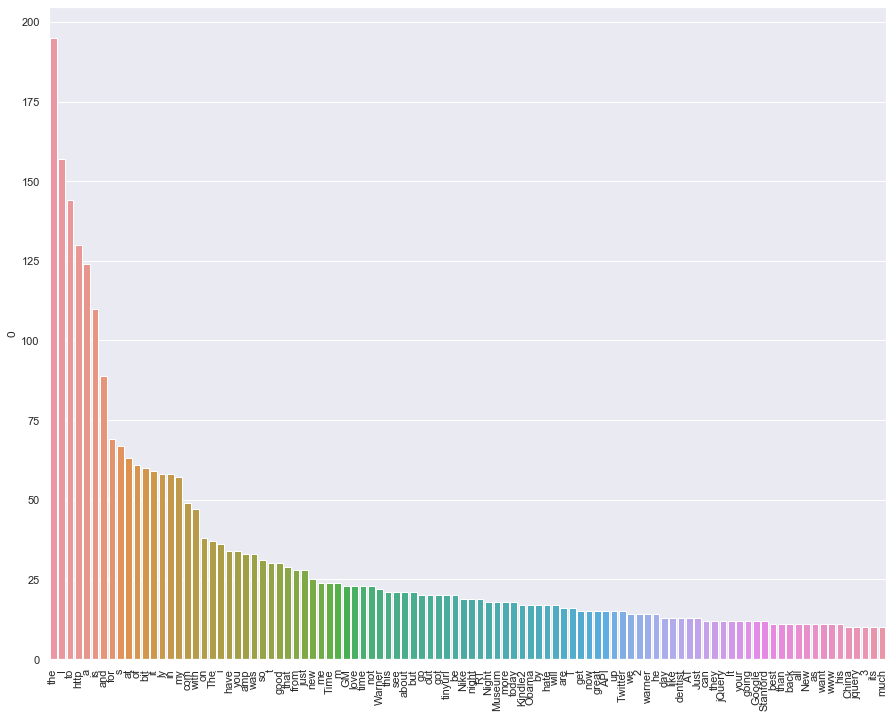

bottom words visualisation:


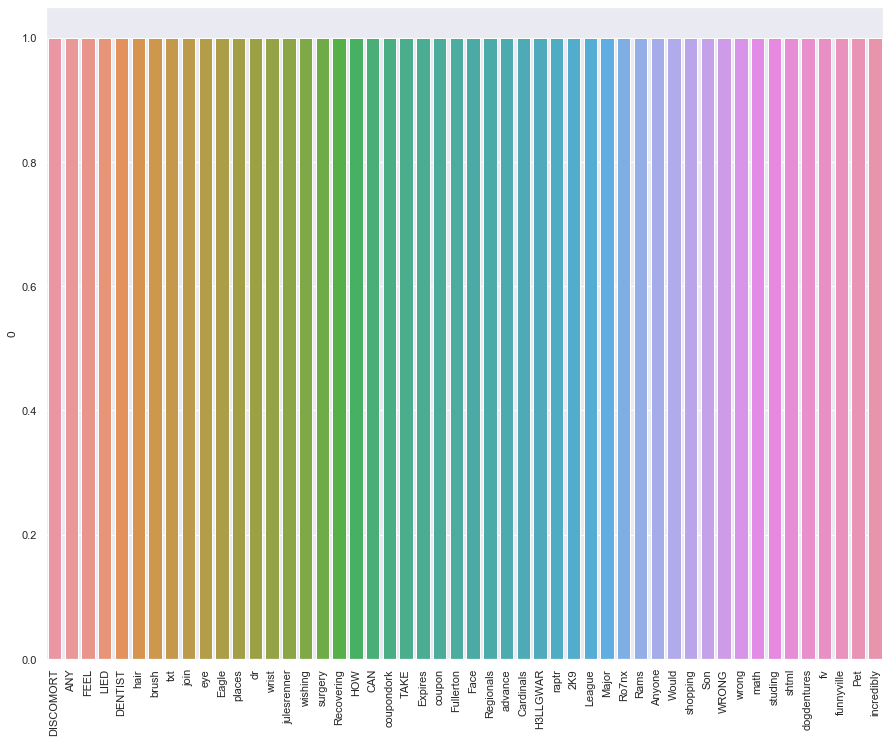

In [34]:
describe_data_set(test_data)

data head:


,polarity,id,date,query,user,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


distribution of polarity:


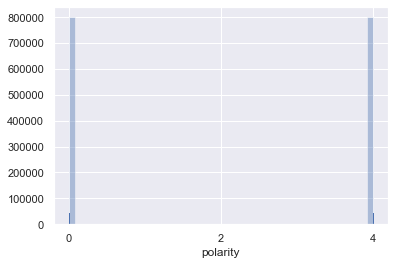

top words visualisation:


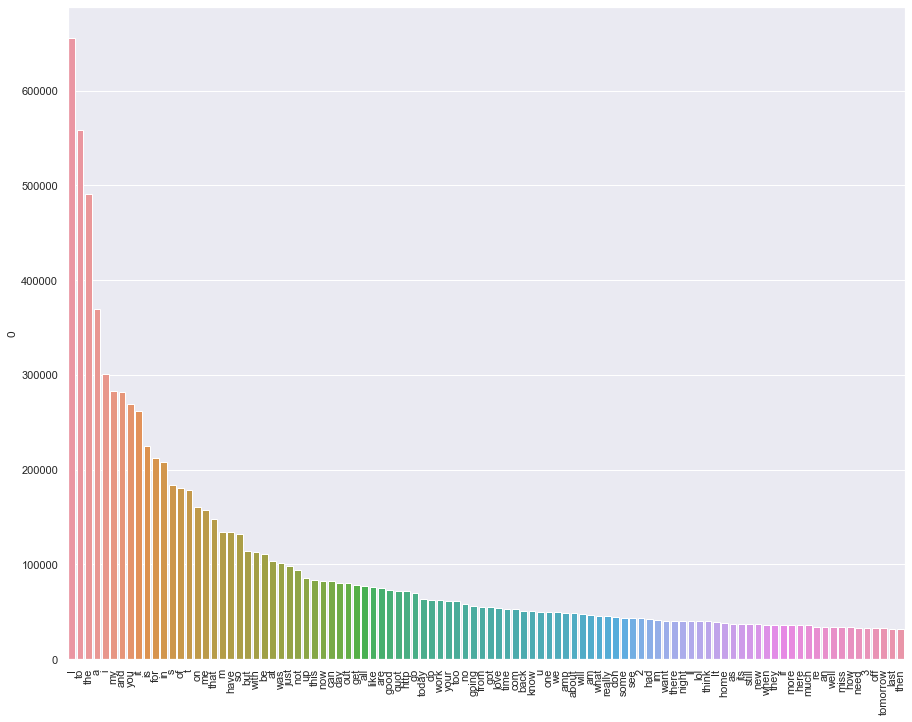

bottom words visualisation:


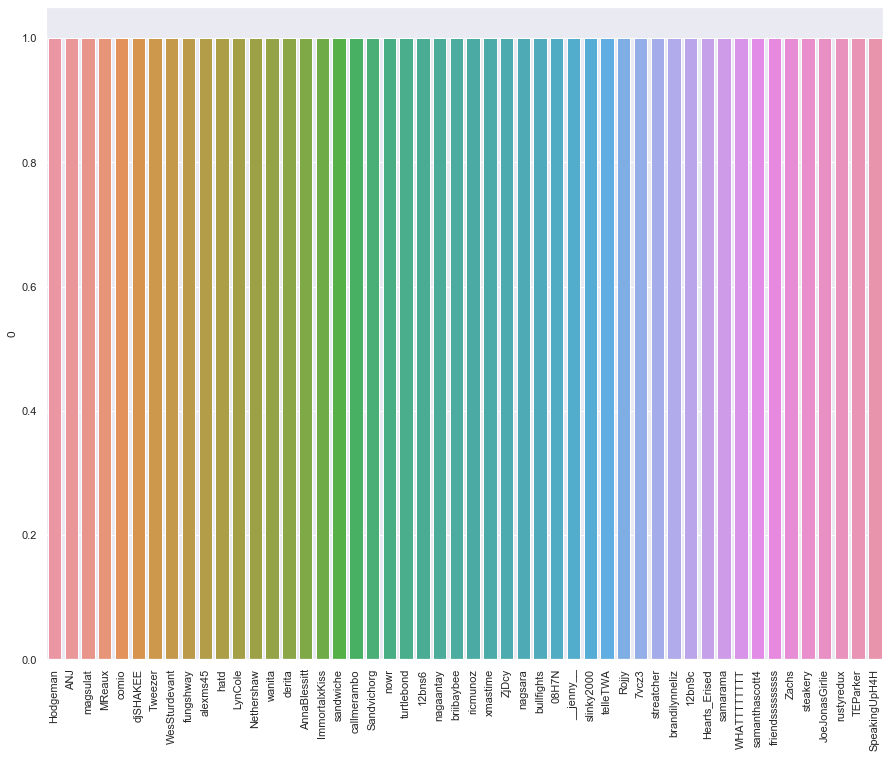

In [36]:
describe_data_set(training_data)